In [3]:
import sys
sys.path.append("/Users/leah/Columbia/courses/19summer/microbialdynamics")

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow_probability import distributions as tfd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle
import os

from src.utils.data_loader import load_data
from src.utils.data_interpolation import interpolate_data
from src.utils.available_data import DATA_DIR_DICT
from src.rslts_saving.rslts_saving import plot_obs_bar_plot

In [6]:
data_type = "count"
repo_dir = "/Users/leah/Columbia/courses/19summer/microbialdynamics"
datadir = DATA_DIR_DICT[data_type]
datadir = os.path.join(repo_dir, datadir)

Dx = 3

hidden_train, hidden_test, obs_train, obs_test, input_train, input_test, extra_inputs_train, extra_inputs_test = \
    load_data(datadir, Dx, False)

"""
hidden_train, hidden_test, obs_train, obs_test, input_train, input_test, _mask_train, _mask_test, time_interval_train, time_interval_test, extra_inputs_train, extra_input_test = \
                interpolate_data(hidden_train, hidden_test, obs_train, obs_test, input_train, input_test,
                                 extra_inputs_train, extra_inputs_test, False)


masks = _mask_train + _mask_test
obs = obs_train + obs_test
inputs = input_train + input_test

"""

'\nhidden_train, hidden_test, obs_train, obs_test, input_train, input_test, _mask_train, _mask_test, time_interval_train, time_interval_test, extra_inputs_train, extra_input_test =                 interpolate_data(hidden_train, hidden_test, obs_train, obs_test, input_train, input_test,\n                                 extra_inputs_train, extra_inputs_test, False)\n\n\nmasks = _mask_train + _mask_test\nobs = obs_train + obs_test\ninputs = input_train + input_test\n\n'

In [12]:
len(inputs)

21

In [23]:
obs[0].shape

(42, 11)

In [13]:
inputs[0].shape

(42, 15)

In [87]:
inputs[0][0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [86]:
inputs[0].shape

(42, 15)

In [119]:
def bar_plot(ax, obs, mask, to_normalize=True,):
    if to_normalize:
            obs = obs / np.sum(obs, axis=-1, keepdims=True)

    time, Dy = obs.shape

    # make missing obs = 0
    masked_obs = np.zeros_like(obs)
    masked_obs[mask] = obs[mask]
    
    ax.set_xlabel("Time")
    bottom = np.zeros(time)
    for j in range(Dy):
        ax.bar(np.arange(time), masked_obs[:, j], bottom=bottom, edgecolor='white')
        bottom += masked_obs[:, j]

    ax.set_xticks(np.arange(time))
    sns.despine()
    

def input_plot(ax, inputs):
    time, Dv = inputs.shape
    
    for j in range(Dv):
        has_inputs = inputs[:,j]== 1
        idx = np.arange(time)[has_inputs]
        ax.bar(idx, [1 for _ in idx], bottom=[j for _ in idx], color='blue')
    
    ax.set_xticks(np.arange(time))
    ax.set_yticks(np.arange(Dv))
    sns.despine()
        

In [126]:
def plot_inputs_and_obs(i):
    plt.figure(figsize=(15,10))

    ax1= plt.subplot(2,1,1)
    input_plot(ax1, inputs[i])
    ax1.grid()

    ax2 = plt.subplot(2,1,2, sharex = ax1)
    bar_plot(ax2, obs[i], masks[i])
    ax2.grid()

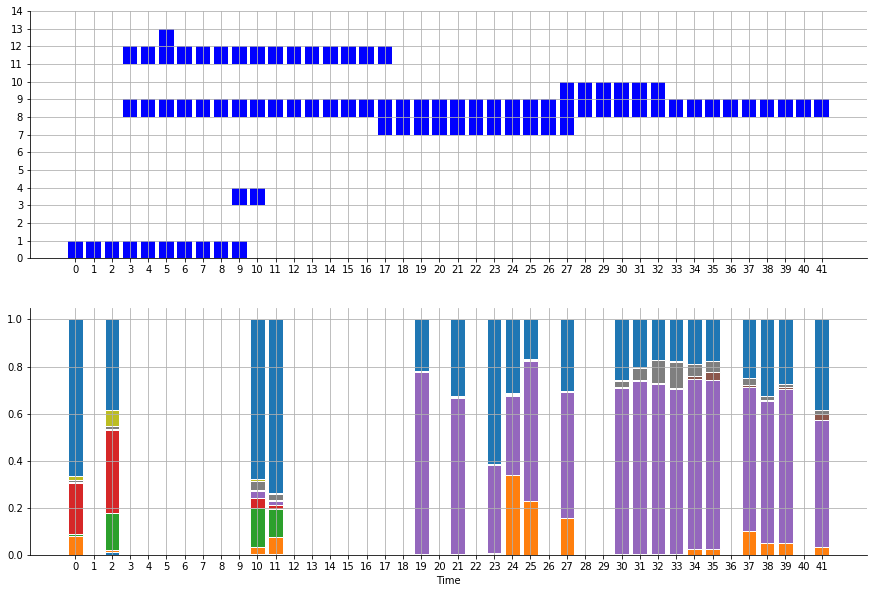

In [127]:
plot_inputs_and_obs(0)

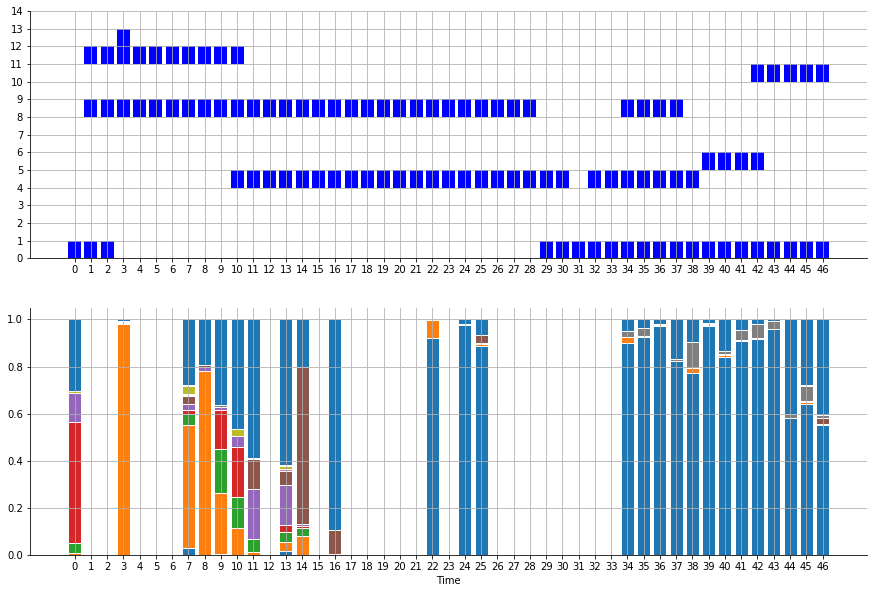

In [123]:
plot_inputs_and_obs(1)

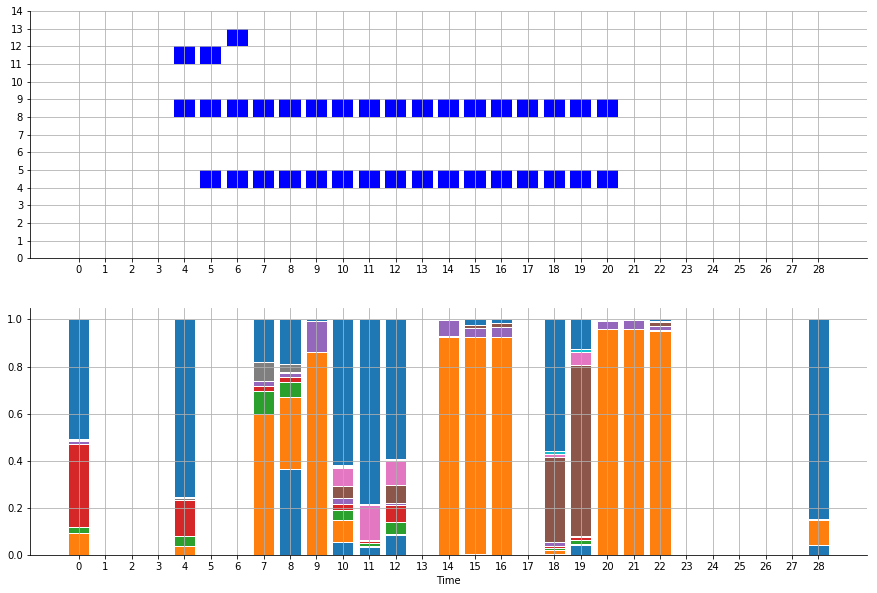

In [128]:
plot_inputs_and_obs(2)

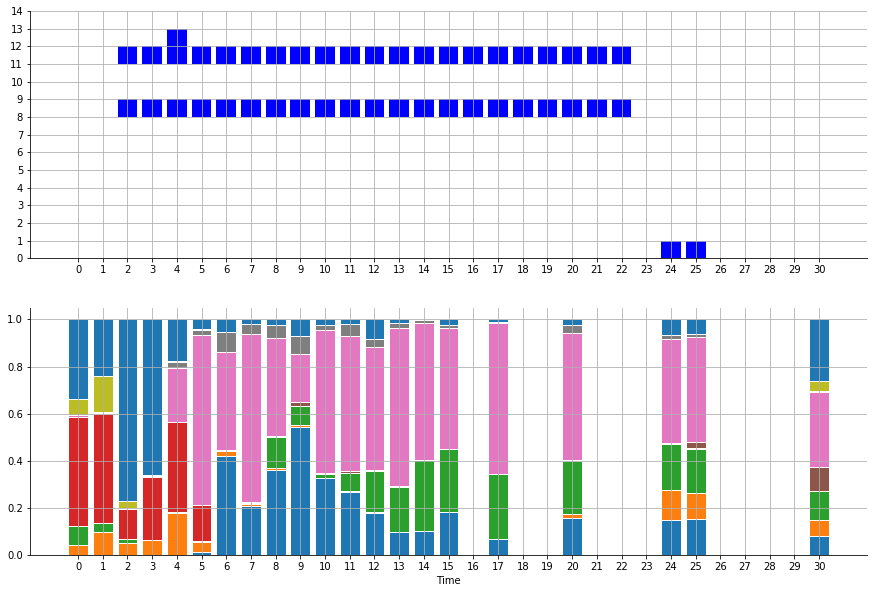

In [129]:
plot_inputs_and_obs(8)

In [ ]:
for i in range(len(obs)):
    plot_inputs_and_obs(i)
    plt.savefig("microbio_inputs_and_obs/{}".format(i))

In [134]:
len(masks)

21

In [139]:
for m in masks:
    print(sum(m) / len(m))

0.47619047619047616
0.5531914893617021
0.5862068965517241
0.8695652173913043
0.7241379310344828
0.4857142857142857
0.46551724137931033
0.6071428571428571
0.6774193548387096
0.5151515151515151
0.75
0.5
0.7307692307692307
0.5
0.8
0.4186046511627907
0.68
0.39473684210526316
0.7777777777777778
0.8
0.6153846153846154


In [ ]:
0.4 2
0.5 7
0.6 3
0.7 5
0.8 4